# ["Buffer-Stock Saving and the Life Cycle/Permanent Income Hypothesis](https://www.jstor.org/stable/2951275?seq=1#page_scan_tab_contents)"
- Original Paper by Christopher D. Carroll
- Notebook by Yusuf Suha Kulu and Jeongwon (John) Son

### Summary

This paper argues that the saving behavior of households is better described by a "buffer stock" version of the Life Cycle/Permanent Income Hypothesis (LC/PIH), which incorporates income uncertainty and the corresponding precautionary saving motive, than by the traditional perfect foresight version of that model. During the buffer stock phase of the life cycle, consumers set average consumption growth equal to average labor income growth. During this phase, the model predicts a high marginal propensity to consume (MPC) out of transitory income, a high effective discount rate for future labor income, and a strong correlation between saving and expected labor income growth.  The paper shows that under plausible configurations of parameter values, including a time preference factor of 0.96, relative risk aversion of 2, and an age-income profile matching the evidence in the U.S., the  median consumer can optimally engage in "buffer stock" saving behavior until late middle age, before beginning to behave in ways that more closely resemble the traditional perfect foresight life  cycle  model.

The finite horizon version of the model presented in the paper explains three emprical puzzles.

1. __Consumption/income parallel :__  Aggregate consumption parallels growth in income over periods of more than a few years.
2. __Consumption/income divergence :__ For individual households, consumption is far from current income. This implies the consumption/income parallel does not arise at the household level.
3. __Stability of the household age/wealth profile :__ The effects of the productivity growth slowdown after 1973 on the age/median-wealth profile and the extraordinarily high volatility of the household liquid wealth are explained. 


The traditional perfect foresight model is the following:

Finite Horizon  

$$c_t = \kappa_t[m_t + h_t]$$ 
$$h_t = \sum_{i=t+1}^{T}R^{i-t}y_{i} $$
$$\kappa_t = \frac{(1 - {[R^{-1}(\beta R)^{1/\rho}]})}{(1 - {[R^{-1}(\beta R)^{1/\rho}]}^{T-t+1})}$$



Infinite Horizon 

$$c_t = \kappa_t[m_t + h_t]$$
$$h_t = \sum_{i=t+1}^{\infty}R^{i-t}y_{i} \approx \frac{y_t}{r - g}$$
$$\kappa = {(1 - {[R^{-1}(\beta R)^{1/\rho}]})}$$

The buffer stock version of the model will be different.

### Model Setup

 

The consumer solves the following intertemporal optimization problem. 

 

$$ \max \quad E_t \Sigma_{n=0}^{T-t} \beta^{n}u(c_{t+n}) $$

\begin{aligned} \text{s.t.} \quad b_{t+1} &= R[b_t + y_t - c_t]\\
y_t &= p_tv_t\\
p_t &= G_tp_{t-1}n_t 
\end{aligned}

$y$: current labor income 

$p$: permanent labor income 

$v$: transitory income shock 

$n$: permanent income shock

$G = (1+g)$: growth factor for permanent labor income 

$b$: stock of physical net wealth 

$R = (1+r)$: gross interest rate 

$\beta = 1/(1+\delta)$: discount factor

 

Solving the consumer's optimization problem gives the following Euler equation. 

 

$$1= R\beta E_{t-1}[\{c_t[R[m_{t-1}-c_{t-1}]/Gn_t + v_t]Gn_t/c_{t-1}\}^{-\rho}]$$ 

Lower case variables are defined as the uppercase variables divided by the current level of permanent income. 

$m = b+y$: gross wealth

 

Since this is a life cycle model, the consumer consumes everything in the last period:$c_T[m_T] = m_T$. This implies that by recursion, the Euler equation gives the consumption ratio for each period. 

 

If shocks to consumption are assumed to be lognormally distributed, a log-linearized version of the Euler equation takes the following form.

 

$$ E_t\Delta \ln c_{t+1} \approx \rho^{-1}(r-\delta) + (\rho/2)\text{var}_t(\Delta\ln c_{t+1}) + e_{t+1} $$

 

The figure below depicts expected consumption growth. As can be seen from the directional arrows, there is a target level of wealth ratio and consumption ratio.

In [1]:
# The following references have been terrific sources of help in creating this Notebook.
# https://github.com/llorracc/BufferStockTheory/blob/master/Code/Python/BufferStockTheory.ipynb
# https://github.com/econ-ark/HARK/blob/master/HARK/SolvingMicroDSOPs/Code/StructEstimation.py
# https://github.com/econ-ark/HARK/blob/master/HARK/ConsumptionSaving/ConsIndShockModel.py
# https://github.com/econ-ark/HARK/blob/master/HARK/ConsumptionSaving/ConsumerParameters.py
# https://github.com/matthew-zahn/CGMPort/blob/develop/REMARK/CGM_REMARK.ipynb
# https://github.com/zhuang13atJHU/ballpark/blob/subsubbranch-Aiyagari/models/We-Would-Like-In-Econ-ARK/AiyagariIdiosyncratic/do_all.py

In [2]:
# This cell has a bit of initial setup.
%matplotlib inline
import matplotlib.pyplot as plt

# The first step is to be able to bring things in from different directories
import sys 
import os

sys.path.insert(0, os.path.abspath('../lib'))

#from util import log_progress

import numpy as np
import HARK 
from time import clock
from copy import deepcopy
mystr = lambda number : "{:.4f}".format(number)
from HARK.utilities import plotFuncs

In [3]:
# Define a parameter dictionary with baseline parameter values

# Set the baseline parameter values 
PermGroFac = 1.02
Rfree      = 1
DiscFac    = 0.96
CRRA       = 2.00
UnempPrb   = 0.005
IncUnemp   = 0.0
PermShkStd = 0.1
TranShkStd = 0.1
# Import default parameter values
import HARK.ConsumptionSaving.ConsumerParameters as Params 

# Make a dictionary containing all parameters needed to solve the model
base_params = Params.init_idiosyncratic_shocks

# Set the parameters for the baseline results in the paper
# using the variable values defined in the cell above
base_params['PermGroFac'] = [PermGroFac]   # Permanent income growth factor
base_params['Rfree']      = Rfree          # Interest factor on assets
base_params['DiscFac']    = DiscFac        # Time Preference Factor
base_params['CRRA']       = CRRA           # Coefficient of relative risk aversion
base_params['UnempPrb']   = UnempPrb       # Probability of unemployment (e.g. Probability of Zero Income in the paper)
base_params['IncUnemp']   = IncUnemp       # Induces natural borrowing constraint
base_params['PermShkStd'] = [PermShkStd]   # Standard deviation of log permanent income shocks
base_params['TranShkStd'] = [TranShkStd]   # Standard deviation of log transitory income shocks

# Some technical settings that are not interesting for our purposes
base_params['LivPrb']       = [1.0]   # 100 percent probability of living to next period
base_params['CubicBool']    = True    # Use cubic spline interpolation
base_params['T_cycle']      = 1       # No 'seasonal' cycles
base_params['BoroCnstArt']  = None    # No artificial borrowing constraint



In [4]:
# Import the key tools needed from the HARK toolkit
from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType #Import consumer type
baseEx_inf = IndShockConsumerType(cycles=0,**base_params) #cycles=0 implies infinite horizon model

baseEx_inf.solve()
baseEx_inf.unpackcFunc()

The given type violates the finite human wealth condition; the finite human wealth factor value 1.02000 


In [5]:
# Define a function to calculate expected consumption 
def exp_consumption(a):
    '''
    Taking end-of-period assets as input, return expectation of next period's consumption
    Inputs:
       a: end-of-period assets
    Returns:
       expconsump: next period's expected consumption
    '''
    GrowFactp1 = baseEx_inf.PermGroFac[0]* baseEx_inf.PermShkDstn[0][1]
    Rnrmtp1 = baseEx_inf.Rfree / GrowFactp1
    # end-of-period assets plus normalized returns
    btp1 = Rnrmtp1*a
    # expand dims of btp1 and use broadcasted sum of a column and a row vector
    # to obtain a matrix of possible beginning-of-period assets next period
    mtp1 = np.expand_dims(btp1, axis=1) + baseEx_inf.TranShkDstn[0][1]
    part_expconsumption = GrowFactp1*baseEx_inf.cFunc[0](mtp1).T
    # finish expectation over permanent income shocks by right multiplying with
    # the weights
    part_expconsumption = np.dot(part_expconsumption, baseEx_inf.PermShkDstn[0][0])
    # finish expectation over transitory income shocks by right multiplying with
    # weights
    expconsumption = np.dot(part_expconsumption, baseEx_inf.TranShkDstn[0][0])
    # return expected consumption
    return expconsumption

In [6]:
# Calculate the expected consumption growth factor
m1 = np.linspace(1,baseEx_inf.solution[0].mNrmSS,50) # m1 defines the plot range on the left of target m value (e.g. m <= target m)
c_m1 = baseEx_inf.cFunc[0](m1)
a1 = m1-c_m1
exp_consumption_l1 = [exp_consumption(i) for i in a1]

# growth1 defines the values of expected consumption growth factor when m is less than target m
growth1 = np.array(exp_consumption_l1)/c_m1

# m2 defines the plot range on the right of target m value (e.g. m >= target m)
m2 = np.linspace(baseEx_inf.solution[0].mNrmSS,1.9,50)
c_m2 = baseEx_inf.cFunc[0](m2)
a2 = m2-c_m2
exp_consumption_l2 = [exp_consumption(i) for i in a2]

# growth 2 defines the values of expected consumption growth factor when m is bigger than target m
growth2 = np.array(exp_consumption_l2)/c_m2

In [7]:
# Define a function to construct the arrows on the consumption growth rate function
def arrowplot(axes, x, y, narrs=15, dspace=0.5, direc='neg',
              hl=0.01, hw=3, c='black'):
    '''
    The function is used to plot arrows given the data x and y.

    Input:
        narrs  :  Number of arrows that will be drawn along the curve

        dspace :  Shift the position of the arrows along the curve.
                  Should be between 0. and 1.

        direc  :  can be 'pos' or 'neg' to select direction of the arrows

        hl     :  length of the arrow head

        hw     :  width of the arrow head

        c      :  color of the edge and face of the arrow head
    '''

    # r is the distance spanned between pairs of points
    r = np.sqrt(np.diff(x)**2+np.diff(y)**2)
    r = np.insert(r, 0, 0.0)

    # rtot is a cumulative sum of r, it's used to save time
    rtot = np.cumsum(r)

    # based on narrs set the arrow spacing
    aspace = r.sum() / narrs

    if direc is 'neg':
        dspace = -1.*abs(dspace)
    else:
        dspace = abs(dspace)

    arrowData = [] # will hold tuples of x,y,theta for each arrow
    arrowPos = aspace*(dspace) # current point on walk along data
                                 # could set arrowPos to 0 if you want
                                 # an arrow at the beginning of the curve

    ndrawn = 0
    rcount = 1
    while arrowPos < r.sum() and ndrawn < narrs:
        x1,x2 = x[rcount-1],x[rcount]
        y1,y2 = y[rcount-1],y[rcount]
        da = arrowPos-rtot[rcount]
        theta = np.arctan2((x2-x1),(y2-y1))
        ax = np.sin(theta)*da+x1
        ay = np.cos(theta)*da+y1
        arrowData.append((ax,ay,theta))
        ndrawn += 1
        arrowPos+=aspace
        while arrowPos > rtot[rcount+1]:
            rcount+=1
            if arrowPos > rtot[-1]:
                break

    for ax,ay,theta in arrowData:
        # use aspace as a guide for size and length of things
        # scaling factors were chosen by experimenting a bit

        dx0 = np.sin(theta)*hl/2.0 + ax
        dy0 = np.cos(theta)*hl/2.0 + ay
        dx1 = -1.*np.sin(theta)*hl/2.0 + ax
        dy1 = -1.*np.cos(theta)*hl/2.0 + ay

        if direc is 'neg' :
            ax0 = dx0
            ay0 = dy0
            ax1 = dx1
            ay1 = dy1
        else:
            ax0 = dx1
            ay0 = dy1
            ax1 = dx0
            ay1 = dy0

        axes.annotate('', xy=(ax0, ay0), xycoords='data',
                xytext=(ax1, ay1), textcoords='data',
                arrowprops=dict( headwidth=hw, frac=1., ec=c, fc=c))

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: 'frac' option in 'arrowprops' is no longer supported; use 'headlength' to set the head length in points.
  func(*args, **kwargs)
/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: 'frac' option in 'arrowprops' is no longer supported; use 'headlength' to set the head length in points.
  fig.canvas.print_figure(bytes_io, **kw)


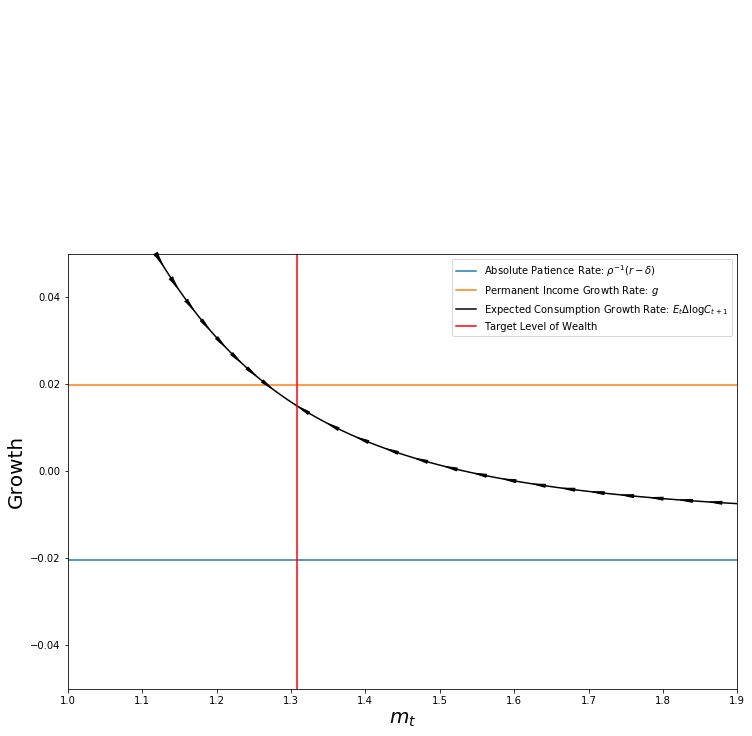

In [8]:
# Plot consumption growth as a function of market resources
# Calculate Absolute Patience Factor Phi = lower bound of consumption growth factor
import math

AbsPatientFac = math.log((baseEx_inf.Rfree*baseEx_inf.DiscFac)**(1.0/baseEx_inf.CRRA))

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)

# Plot the Absolute Patience Factor line
ax.plot([0,2.0],[AbsPatientFac,AbsPatientFac], label=r'Absolute Patience Rate: $\rho^{-1}(r-\delta)$')

# Plot the Permanent Income Growth Factor line
ax.plot([0,2.0],[math.log(baseEx_inf.PermGroFac[0]),math.log(baseEx_inf.PermGroFac[0])], label=r'Permanent Income Growth Rate: $g$')

# Plot the expected consumption growth factor on the left side of target m
ax.plot(m1,np.log(growth1),color="black", label=r'Expected Consumption Growth Rate: $E_t\Delta \log C_{t+1}$')

# Plot the expected consumption growth factor on the right side of target m
ax.plot(m2,np.log(growth2),color="black")

# Plot the arrows
arrowplot(ax, m1,np.log(growth1))
arrowplot(ax, m2,np.log(growth2), direc='pos')

# Plot the target m
ax.plot([baseEx_inf.solution[0].mNrmSS,baseEx_inf.solution[0].mNrmSS],[-1,1.4],color="red", label='Target Level of Wealth')
ax.set_xlim(1,1.9)
ax.set_ylim(-0.05,0.05)

plt.xlabel('$m_t$', fontsize=20)
plt.ylabel('Growth', fontsize=20)
plt.legend()

In [9]:
#Create a new consumer instance with lower permanent income growth (1.005)

# Make a dictionary containing all parameters needed to solve the model
base_params1 = Params.init_idiosyncratic_shocks

# Set the parameters for the baseline results in the paper
# using the variable values defined in the cell above
base_params1['PermGroFac'] = [1.005]        # Permanent income growth factor reduced
base_params1['Rfree']      = Rfree          # Interest factor on assets
base_params1['DiscFac']    = DiscFac        # Time Preference Factor
base_params1['CRRA']       = CRRA           # Coefficient of relative risk aversion
base_params1['UnempPrb']   = UnempPrb       # Probability of unemployment (e.g. Probability of Zero Income in the paper)
base_params1['IncUnemp']   = IncUnemp       # Induces natural borrowing constraint
base_params1['PermShkStd'] = [PermShkStd]   # Standard deviation of log permanent income shocks
base_params1['TranShkStd'] = [TranShkStd]   # Standard deviation of log transitory income shocks

# Some technical settings that are not interesting for our purposes
base_params1['LivPrb']       = [1.0]   # 100 percent probability of living to next period
base_params1['CubicBool']    = True    # Use cubic spline interpolation
base_params1['T_cycle']      = 1       # No 'seasonal' cycles
base_params1['BoroCnstArt']  = None    # No artificial borrowing constraint

In [10]:
from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType
baseEx_inf1 = IndShockConsumerType(cycles=0,**base_params1)

baseEx_inf1.solve()
baseEx_inf1.unpackcFunc()

The given type violates the finite human wealth condition; the finite human wealth factor value 1.00500 


In [11]:
# Redefine a function to calculate expected consumption since the model has changed
def exp_consumption(a):
    '''
    Taking end-of-period assets as input, return expectation of next period's consumption
    Inputs:
       a: end-of-period assets
    Returns:
       expconsump: next period's expected consumption
    '''
    GrowFactp1 = baseEx_inf1.PermGroFac[0]* baseEx_inf1.PermShkDstn[0][1]
    Rnrmtp1 = baseEx_inf1.Rfree / GrowFactp1
    # end-of-period assets plus normalized returns
    btp1 = Rnrmtp1*a
    # expand dims of btp1 and use broadcasted sum of a column and a row vector
    # to obtain a matrix of possible beginning-of-period assets next period
    mtp1 = np.expand_dims(btp1, axis=1) + baseEx_inf1.TranShkDstn[0][1]
    part_expconsumption = GrowFactp1*baseEx_inf1.cFunc[0](mtp1).T
    # finish expectation over permanent income shocks by right multiplying with
    # the weights
    part_expconsumption = np.dot(part_expconsumption, baseEx_inf1.PermShkDstn[0][0])
    # finish expectation over transitory income shocks by right multiplying with
    # weights
    expconsumption = np.dot(part_expconsumption, baseEx_inf1.TranShkDstn[0][0])
    # return expected consumption
    return expconsumption

In [12]:
# Calculate the expected consumption growth factor
m11 = np.linspace(1,baseEx_inf1.solution[0].mNrmSS,50) # m11 defines the plot range on the left of target m value (e.g. m <= target m)
c_m11 = baseEx_inf1.cFunc[0](m11)
a11 = m11-c_m11
exp_consumption_l11 = [exp_consumption(i) for i in a11]

# growth11 defines the values of expected consumption growth factor when m is less than target m
growth11 = np.array(exp_consumption_l11)/c_m11

# m21 defines the plot range on the right of target m value (e.g. m >= target m)
m21 = np.linspace(baseEx_inf1.solution[0].mNrmSS,1.9,50)
c_m21 = baseEx_inf1.cFunc[0](m21)
a21 = m21-c_m21
exp_consumption_l21 = [exp_consumption(i) for i in a21]

# growth 21 defines the values of expected consumption growth factor when m is bigger than target m
growth21 = np.array(exp_consumption_l21)/c_m21

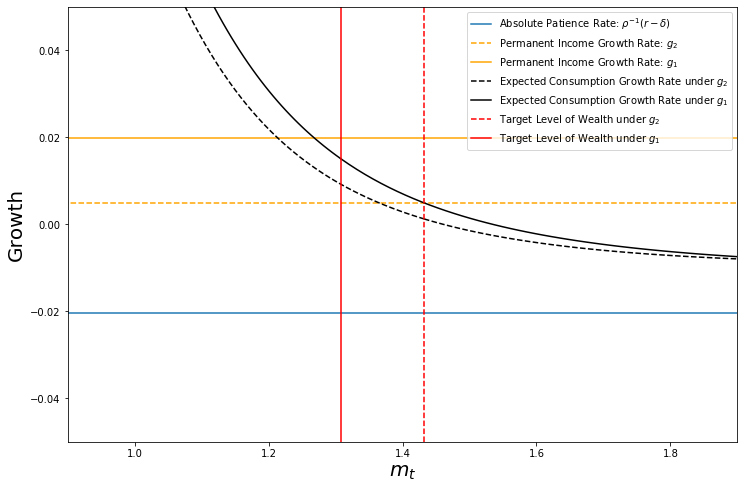

In [13]:
# Plot consumption growth for both cases (high growth and low growth) as a function of market resources
# Calculate Absolute Patience Factor Phi = lower bound of consumption growth factor
AbsPatientFac1 = math.log((baseEx_inf1.Rfree)*(baseEx_inf1.DiscFac)**(1.0/baseEx_inf1.CRRA))

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)
# Plot the Absolute Patience Factor line
ax.plot([0,1.9],[AbsPatientFac1,AbsPatientFac1],label=r'Absolute Patience Rate: $\rho^{-1}(r-\delta)$')

# Plot the Permanent Income Growth Factor line
ax.plot([0,1.9],[math.log(baseEx_inf1.PermGroFac[0]),math.log(baseEx_inf1.PermGroFac[0])], label=r'Permanent Income Growth Rate: $g_2$', color='orange', linestyle="--")
ax.plot([0,1.9],[math.log(baseEx_inf.PermGroFac[0]),math.log(baseEx_inf.PermGroFac[0])], label=r'Permanent Income Growth Rate: $g_1$', color='orange')

# Plot the expected consumption growth factor on the left side of target m
ax.plot(m11,np.log(growth11),color="black",linestyle="--", label=r'Expected Consumption Growth Rate under $g_2$')
ax.plot(m1,np.log(growth1),color="black", label=r'Expected Consumption Growth Rate under $g_1$')

# Plot the expected consumption growth factor on the right side of target m
ax.plot(m21,np.log(growth21),color="black", linestyle="--")
ax.plot(m2,np.log(growth2),color="black")

# Plot the target m
ax.plot([baseEx_inf1.solution[0].mNrmSS,baseEx_inf1.solution[0].mNrmSS],[-0.05,0.05],color="red",linestyle="--", label='Target Level of Wealth under $g_2$')
ax.plot([baseEx_inf.solution[0].mNrmSS,baseEx_inf.solution[0].mNrmSS],[-0.05,0.05],color="red", label='Target Level of Wealth under $g_1$')

ax.set_xlim(0.9,1.9)
ax.set_ylim(-0.05,0.05)
plt.xlabel('$m_t$',fontsize=20)
plt.ylabel('Growth',fontsize=20)
plt.legend()

### Methods of Solution

 

The optimal consumption for a given value of gross wealth, $c_t(m_t)$, is derived by solving the Euler equation recursively backwards.

 

1. $c_T(m_T) = m_T$

2. For $n$ values of $m_{T-1}$, by using the Euler equation, compute the corresponding $n$ values of $c_{T-1}(m_{T-1})$.

3. Using cubic interpolation for values of $m_{T-1}$ between the n values, numerically calculate the function $c_{T-1}(m_{T-1})$.

4. Given $c_{T-1}(m_{T-1})$, use the same methods as 2 and 3 to numerically solve for $c_{T-2}(m_{T-2})$.

5. Continue this method until period $t$.

 

For the infinite horizon version of this model, the following convergence criterion is used.

$$\frac{1}{n}\Sigma\vert c_t(m_i) - c_{t+1}(m_i)\vert < 0.0005$$

### Resolving Three Emprical Puzzles

#### 1) The Consumption/Income Parallel in Low Frequency Data

Consumption growth and income growth are very closely linked over periods of a few years or longer.

Three age/income profiles calibrated using the data for Unskilled Laborers, Operatives, and Managers.
1. For Unskilled Labor,labor income grows at 3% annually from ages 25 to 40, and is flat from age 40 to retirement at 65.
2. For Operatives, labor income grows at 2.5% annually from the age 25 to 50, then 1% per year until retirement.
3. For Managers, income grows at 3% from ages 25 to 55, and declines at 1% per year from 55 to 65.

Post-retirement income is assumed to equal 70 percent income in the last year of the working life, for all three groups. 

In [14]:
#Some preliminary setup for the lifecycle model

import HARK.ConsumptionSaving.ConsIndShockModel as Model    
import HARK.ConsumptionSaving.ConsumerParameters as Params
from HARK.utilities import plotFuncsDer, plotFuncs
from time import time
mystr = lambda number : "{:.4f}".format(number)
do_simulation = True
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#Set Parameters

Params.init_lifecycle["CRRA"]= 2.00            # Default coefficient of relative risk aversion (rho)
Params.init_lifecycle["DiscFac"]= 0.96         # Default intertemporal discount factor (beta)
Params.init_lifecycle["PermGroFacAgg"]= 1.02   # Aggregate permanent income growth factor 
Params.init_lifecycle["aNrmInitMean"]= -1000   # Mean of log initial assets. Set to -1000 so that initial assets is close to 0.
Params.init_lifecycle["aNrmInitStd"]= 0.0      # Standard deviation of log initial assets. All agents start with the same amount of assets.
Params.init_lifecycle["pLvlInitMean"]= 0.0     # Mean of log initial permanent income. Initial permanent income is set to 1.
Params.init_lifecycle["pLvlInitStd"]= 0.0      # Standard deviation of log initial permanent income. All agents start with the same permanent level of income.
Params.init_lifecycle["Rfree"]= 1.00           # Follows the paper's choice of risk free interest rates.

Params.init_lifecycle['AgentCount'] = 10000    # Number of agents simulated

Params.init_lifecycle['PermShkStd'] = [0.1]*40 + [0]*9      # SD of Permanent income shock
Params.init_lifecycle['TranShkStd'] = [0.1]*40 + [0]*9      # SD of Transitory income shock
Params.init_lifecycle['LivPrb']     = [1]*49                # Probability of living.
Params.init_lifecycle['T_cycle']    = 49                    # Agents are simulated for 49 periods.
Params.init_lifecycle['T_retire']   = 40                    # Agents retire at age 65, or their 40th period.
Params.init_lifecycle['T_age']      = 50                    #Make sure that old people die at terminal age and don't turn into newborns!

In [16]:
#Unskilled Laborers: 3 percent growth from 26~40. flat for 40~65.

Params.init_lifecycle["pLvlInitMean"]= math.log(1/1.03)  #There seems to be a bug where the permanent income is increased by the growth rate already in the first period. This is set to offset that and have agents start with permanent income of 1.
Params.init_lifecycle['PermGroFac'] = [1.03]*14 + [1]*25 + [0.7] + [1]*9     # Income growth over the lifetime for unskilled workers

Lifecycle_Unskilled = Model.IndShockConsumerType(**Params.init_lifecycle)
Lifecycle_Unskilled.cycles = 1 #1 for finite horizon and 0 for infinite horizon
Lifecycle_Unskilled.solve()
Lifecycle_Unskilled.unpackcFunc()
Lifecycle_Unskilled.timeFwd() #make sure that time is moving forward

In [17]:
#Operatives: 2.5 percent growth from 26~50. 1 percent growth from 50~65.

Params.init_lifecycle["pLvlInitMean"]= math.log(1/1.025) #This is set as such to offset growth bug
Params.init_lifecycle['PermGroFac'] = [1.025]*24 + [1.01]*15 + [0.7] + [1]*9     #Income growth over the lifetime for operatives

Lifecycle_Operatives = Model.IndShockConsumerType(**Params.init_lifecycle)
Lifecycle_Operatives.cycles = 1 #1 for finite horizon and 0 for infinite horizon
Lifecycle_Operatives.solve()
Lifecycle_Operatives.unpackcFunc()
Lifecycle_Operatives.timeFwd() #make sure that time is moving forward

In [18]:
#Managers: 3 percent growth from 26~55. 1 percent decline from 55~65.

Params.init_lifecycle["pLvlInitMean"]= math.log(1/1.03) #This is set as such to offset growth bug
Params.init_lifecycle['PermGroFac'] = [1.03]*29 + [0.99]*10 + [0.7] + [1]*9     #Income growth over the lifetime for managers

Lifecycle_Managers = Model.IndShockConsumerType(**Params.init_lifecycle)
Lifecycle_Managers.cycles = 1 #1 for finite horizon and 0 for infinite horizon
Lifecycle_Managers.solve()
Lifecycle_Managers.unpackcFunc()
Lifecycle_Managers.timeFwd() #make sure that time is moving forward

In [19]:
#Simulate the models for each agent type

if do_simulation:
    Lifecycle_Unskilled.T_sim = 49 #Simulate agents for 49 periods since their lifespan is 49 periods
    Lifecycle_Unskilled.track_vars = ['aNrmNow','mNrmNow','cNrmNow','pLvlNow','t_age'] #track these variables
    Lifecycle_Unskilled.initializeSim()
    Lifecycle_Unskilled.simulate()
    
if do_simulation:
    Lifecycle_Operatives.T_sim = 49
    Lifecycle_Operatives.track_vars = ['aNrmNow','mNrmNow','cNrmNow','pLvlNow','t_age']
    Lifecycle_Operatives.initializeSim()
    Lifecycle_Operatives.simulate()

if do_simulation:
    Lifecycle_Managers.T_sim = 49
    Lifecycle_Managers.track_vars = ['aNrmNow','mNrmNow','cNrmNow','pLvlNow','t_age']
    Lifecycle_Managers.initializeSim()    
    Lifecycle_Managers.simulate()
    
#aNrmNow: End of Period Assets normalized by permanent income
#mNrmNow: Market Resources (beginning of period assets + income) normalized by permanent income
#cNrmNow: Consumption normalized by permanent income
#pLvlNow: Permanent level of income
#t_age:   Period of the simulation

In [20]:
#Save the simulated data into a dataframe

import pandas as pd
raw_data = {'T_age': Lifecycle_Unskilled.t_age_hist.flatten()+25, #add 25 to make the starting age 26. age is same for all occupations so so need to make three of these.
            'cNrmNow_Unskilled': Lifecycle_Unskilled.cNrmNow_hist.flatten(),
            'pLvlNow_Unskilled': Lifecycle_Unskilled.pLvlNow_hist.flatten(),
            'cNrmNow_Operatives': Lifecycle_Operatives.cNrmNow_hist.flatten(),
            'pLvlNow_Operatives': Lifecycle_Operatives.pLvlNow_hist.flatten(),
            'cNrmNow_Managers': Lifecycle_Managers.cNrmNow_hist.flatten(),
            'pLvlNow_Managers': Lifecycle_Managers.pLvlNow_hist.flatten()}

Data = pd.DataFrame(raw_data) #make the raw data into a formal dataset

Data['Cons_Unskilled'] = Data.cNrmNow_Unskilled * Data.pLvlNow_Unskilled #This represents consumption level
Data['Cons_Operatives'] = Data.cNrmNow_Operatives * Data.pLvlNow_Operatives
Data['Cons_Managers'] = Data.cNrmNow_Managers * Data.pLvlNow_Managers
Data['Inc_Unskilled'] = Data.pLvlNow_Unskilled
Data['Inc_Operatives'] = Data.pLvlNow_Operatives 
Data['Inc_Managers'] = Data.pLvlNow_Managers

AgeMeans = Data.groupby(['T_age']).mean().reset_index() # Group the dataset by T_age and get the mean.

(0.8, 2.5)

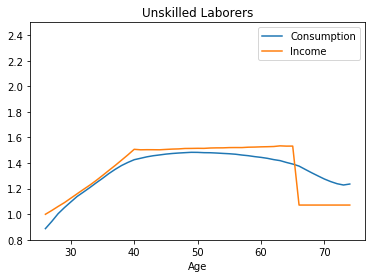

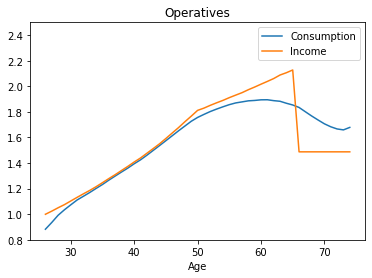

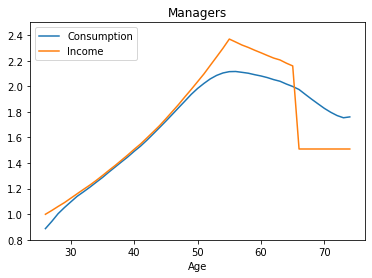

In [21]:
# Plot the figures
plt.figure()

plt.plot(AgeMeans.T_age, AgeMeans.Cons_Unskilled,label='Consumption')
plt.plot(AgeMeans.T_age, AgeMeans.Inc_Unskilled,label='Income')

plt.legend()
plt.xlabel('Age')
plt.title('Unskilled Laborers')
plt.ylim(0.8,2.5)

plt.figure()

plt.plot(AgeMeans.T_age, AgeMeans.Cons_Operatives,label='Consumption')
plt.plot(AgeMeans.T_age, AgeMeans.Inc_Operatives, label='Income')

plt.legend()
plt.xlabel('Age')
plt.title('Operatives')
plt.ylim(0.8,2.5)

plt.figure()

plt.plot(AgeMeans.T_age, AgeMeans.Cons_Managers,label='Consumption')
plt.plot(AgeMeans.T_age, AgeMeans.Inc_Managers, label='Income')

plt.legend()
plt.xlabel('Age')
plt.title('Managers')
plt.ylim(0.8,2.5)

Results show the parallel until the age of 45 or 50. Then retirement savings allow income profile to rise above the consumption profile in the years immediately before the retirement.

#### 2) The Consumption/Income Divergence in High Frequency Data

The Buffer-Stock model has no difficulty generating an MPC large enough to match emprical estimates, while the standard LC/PIH model is simply incapable of implying large values for the MPC out of transitory income. 

#### 3) The Behaviour of Wealth over the Lifetime

Median ratio of wealth(financial assets) to income(annual income) is between 2 and 35 percent at all ages before the retirement. This fact is stable over the early 1960s and the late 1980s but there was a sharp slowdown(post-1973) in the productivity growth within this period. 

The productivity growth slowdown is assumed to result in a 1 percent slower growth rate of labor income over the working labor income. 

This fact is not explained by the standard LC/PIH model as the lower growth induces an enourmous increase in household wealth at all ages greater than 30. On average, the slower curve is higher than the faster curve by an amount equal to roughly two years' worth of income. Thus, the model predicts enourmous increase in household wealth/income ratios due to the productivity slowdown. 

Below are figures that show the different wealth ratios over the lifecycle for the standard LC/PIH model (Figure VI) and the buffer stock saving LC/PIH model (Figure VII). The standard LC/PIH model over-estimates the effect of a decrease in productivity growth. The difference between the two productivity growth scenarios in the buffer stock saving LC/PIH model is not remotely so dramatic as in the standard model.

In [22]:
#Simulate Figure VI (Wealth for faster and slower income growth under perfect foresight)

from HARK.ConsumptionSaving.ConsIndShockModel import PerfForesightConsumerType

Params.init_lifecycle["CRRA"]= 2.00            # Default coefficient of relative risk aversion (rho)
Params.init_lifecycle["DiscFac"]= 0.96         # Default intertemporal discount factor (beta)
Params.init_lifecycle["PermGroFacAgg"]= 1.02   # Aggregate permanent income growth factor 
Params.init_lifecycle["aNrmInitMean"]= -1000   # Mean of log initial assets 
Params.init_lifecycle["aNrmInitStd"]= 0.0      # Standard deviation of log initial assets
Params.init_lifecycle["pLvlInitMean"]= 0.0     # Mean of log initial permanent income 
Params.init_lifecycle["pLvlInitStd"]= 0.0      # Standard deviation of log initial permanent income
Params.init_lifecycle["Rfree"]= 1.08           # Risk free interest rate has been set to 8% so that it best fits the the age/wealth profile of data

Params.init_lifecycle['AgentCount'] = 1        # This is a perfect foresight model so we only need 1 agent

Params.init_lifecycle['PermShkStd'] = [0]*49   # No shocks in a perfect foresight model
Params.init_lifecycle['TranShkStd'] = [0]*49   # No shocks in a perfect foresight model
Params.init_lifecycle['LivPrb']     = [1]*49   # No probability of death before terminal age
Params.init_lifecycle['T_cycle']    = 49       # Life starts at age 26 and ends at 75
Params.init_lifecycle['T_retire']   = 40       # Agents retire at age 65
Params.init_lifecycle['T_age']      = 50       # Make sure that old people die at terminal age and don't turn into newborns!

Params.init_lifecycle["pLvlInitMean"]= math.log(1/1.025) #This is set as such to offset growth bug
Params.init_lifecycle['PermGroFac'] = [1.025]*24 + [1.01]*15 + [0.7] + [1]*9     #Lifetime income growth for operatives

Lifecycle_Operatives_PF = Model.PerfForesightConsumerType(**Params.init_lifecycle)
Lifecycle_Operatives_PF.cycles = 1 #1 for finite horizon and 0 for infinite horizon
Lifecycle_Operatives_PF.solve()
Lifecycle_Operatives_PF.unpackcFunc()
Lifecycle_Operatives_PF.timeFwd() #make sure that time is moving forward

Params.init_lifecycle["pLvlInitMean"]= math.log(1/1.015) #This is set as such to offset growth bug
Params.init_lifecycle['PermGroFac'] = [1.015]*24 + [1.00]*15 + [0.7] + [1]*9     #Lifetime income growth for operatives with 1% slower income growth

Lifecycle_Operatives_PF_Slow = Model.PerfForesightConsumerType(**Params.init_lifecycle)
Lifecycle_Operatives_PF_Slow.cycles = 1 #1 for finite horizon and 0 for infinite horizon
Lifecycle_Operatives_PF_Slow.solve()
Lifecycle_Operatives_PF_Slow.unpackcFunc()
Lifecycle_Operatives_PF_Slow.timeFwd() #make sure that time is moving forward


In [23]:
#Simulate the models

if do_simulation:
    Lifecycle_Operatives_PF.T_sim = 49 
    Lifecycle_Operatives_PF.track_vars = ['aNrmNow','mNrmNow','cNrmNow','pLvlNow','t_age'] #track these variables
    Lifecycle_Operatives_PF.initializeSim()
    Lifecycle_Operatives_PF.simulate()

if do_simulation:
    Lifecycle_Operatives_PF_Slow.T_sim = 49
    Lifecycle_Operatives_PF_Slow.track_vars = ['aNrmNow','mNrmNow','cNrmNow','pLvlNow','t_age'] #track these variables
    Lifecycle_Operatives_PF_Slow.initializeSim()
    Lifecycle_Operatives_PF_Slow.simulate()
    
raw_data = {'T_age': Lifecycle_Operatives_PF.t_age_hist.flatten()+25,
            'aNrmNow_Operatives': Lifecycle_Operatives_PF.aNrmNow_hist.flatten(),
            'aNrmNow_Operatives_Slow': Lifecycle_Operatives_PF_Slow.aNrmNow_hist.flatten()}

#Make the simulated results into a dataset

Data = pd.DataFrame(raw_data) #make the raw data into a formal dataset
Data['W_Y_PF'] = Data.aNrmNow_Operatives
Data['W_Y_PF_Slow'] = Data.aNrmNow_Operatives_Slow

Text(0.5, 1.0, 'Figure VI: Standard Lifecycle Model')

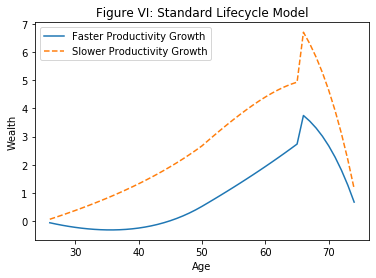

In [24]:
# Plot the results
plt.figure()

plt.plot(Data.T_age, Data.W_Y_PF,label='Faster Productivity Growth')
plt.plot(Data.T_age, Data.W_Y_PF_Slow,label='Slower Productivity Growth',linestyle='--')

plt.legend()
plt.xlabel('Age')
plt.ylabel('Wealth')
plt.title('Figure VI: Standard Lifecycle Model')

In [25]:
# Simulate Figure VII (Wealth for faster and slower income growth)

#Parameter setup and solve

Params.init_lifecycle["CRRA"]= 2.00            # Default coefficient of relative risk aversion (rho)
Params.init_lifecycle["DiscFac"]= 0.96         # Default intertemporal discount factor (beta)
Params.init_lifecycle["PermGroFacAgg"]= 1.02   # Aggregate permanent income growth factor 
Params.init_lifecycle["aNrmInitMean"]= -1000   # Mean of log initial assets 
Params.init_lifecycle["aNrmInitStd"]= 0.0      # Standard deviation of log initial assets
Params.init_lifecycle["pLvlInitMean"]= 0.0     # Mean of log initial permanent income 
Params.init_lifecycle["pLvlInitStd"]= 0.0      # Standard deviation of log initial permanent income
Params.init_lifecycle["Rfree"]= 1.00           # Risk free interest rate set to default 0%

Params.init_lifecycle['AgentCount'] = 10000    # Simulate 10000 agents

Params.init_lifecycle['PermShkStd'] = [0.1]*40 + [0]*9   # SD of permanent income shock
Params.init_lifecycle['TranShkStd'] = [0.1]*40 + [0]*9   # SD of transitory income shock
Params.init_lifecycle['LivPrb']     = [1]*49   # No probability of death before terminal age
Params.init_lifecycle['T_cycle']    = 49       # Life starts at age 26 and ends at 75
Params.init_lifecycle['T_retire']   = 40       # Agents retire at age 65
Params.init_lifecycle['T_age']      = 50       # Make sure that old people die at terminal age and don't turn into newborns!

Params.init_lifecycle["pLvlInitMean"]= math.log(1/1.025) #This is set as such to offset growth bug
Params.init_lifecycle['PermGroFac'] = [1.025]*24 + [1.01]*15 + [0.7] + [1]*9     #Lifetime income growth for operatives

Lifecycle_Operatives = Model.IndShockConsumerType(**Params.init_lifecycle)
Lifecycle_Operatives.cycles = 1 #1 for finite horizon and 0 for infinite horizon
Lifecycle_Operatives.solve()
Lifecycle_Operatives.unpackcFunc()
Lifecycle_Operatives.timeFwd() #make sure that time is moving forward

Params.init_lifecycle["pLvlInitMean"]= math.log(1/1.015) #This is set as such to offset growth bug
Params.init_lifecycle['PermGroFac'] = [1.015]*24 + [1.0]*15 + [0.7] + [1]*9     #Lifetime income growth for operatives with 1% lower labor income growth

Lifecycle_Operatives_Slower = Model.IndShockConsumerType(**Params.init_lifecycle)
Lifecycle_Operatives_Slower.cycles = 1 #1 for finite horizon and 0 for infinite horizon
Lifecycle_Operatives_Slower.solve()
Lifecycle_Operatives_Slower.unpackcFunc()
Lifecycle_Operatives_Slower.timeFwd() #make sure that time is moving forward

In [26]:
# Do the simulations
if do_simulation:
    Lifecycle_Operatives.T_sim = 49
    Lifecycle_Operatives.track_vars = ['aNrmNow','mNrmNow','cNrmNow','pLvlNow','t_age'] #track these variables
    Lifecycle_Operatives.initializeSim()
    Lifecycle_Operatives.simulate()
    
if do_simulation:
    Lifecycle_Operatives_Slower.T_sim = 49
    Lifecycle_Operatives_Slower.track_vars = ['aNrmNow','mNrmNow','cNrmNow','pLvlNow','t_age'] #track these variables
    Lifecycle_Operatives_Slower.initializeSim()
    Lifecycle_Operatives_Slower.simulate()
    
raw_data = {'T_age': Lifecycle_Operatives.t_age_hist.flatten()+25, 
            'aNrmNow_Operatives': Lifecycle_Operatives.aNrmNow_hist.flatten(),
            'aNrmNow_Operatives_Slower': Lifecycle_Operatives_Slower.aNrmNow_hist.flatten(),}

#Make the simulated results into a dataset

Data = pd.DataFrame(raw_data) #make the raw data into a formal dataset

Data['W_Y_Faster'] = Data.aNrmNow_Operatives #Data is named W_Y since it is wealth normalized by permanent income.
Data['W_Y_Slower'] = Data.aNrmNow_Operatives_Slower
AgeMeans = Data.groupby(['T_age']).median().reset_index() #Group the dataset by T_age and get the median.

Text(0.5, 1.0, 'Figure VII: Buffer Stock Lifecycle Model')

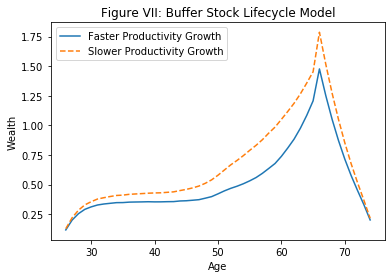

In [27]:
# Plot
plt.figure()

plt.plot(AgeMeans.T_age, AgeMeans.W_Y_Faster,label='Faster Productivity Growth')
plt.plot(AgeMeans.T_age, AgeMeans.W_Y_Slower, label='Slower Productivity Growth',linestyle='--')

plt.legend()
plt.xlabel('Age')
plt.ylabel('Wealth')
plt.title('Figure VII: Buffer Stock Lifecycle Model')

### Variation of Parameter Values

Below are two tables showing different values of model specific variables under different parameters. Table 1 values represent the steady state values under an infinite horizon buffer stock model. Table 2 values represent the steady state values under an infinite horizon perfect foresight model and an infinite horizon buffer stock model.

In [28]:
#Calibrate Table 1

#Some preliminary setup and parameter definitions

import HARK.ConsumptionSaving.ConsumerParameters as Params 

# Make a dictionary containing all parameters needed to solve the model
base_params = Params.init_idiosyncratic_shocks

# Set the parameters for the baseline results in the paper
# using the variable values defined in the cell above
base_params['PermGroFac'] = [1.02]  # Permanent income growth factor
base_params['Rfree']      = 1       # Interest factor on assets
base_params['DiscFac']    = 0.96    # Time Preference Factor
base_params['CRRA']       = 2.00    # Coefficient of relative risk aversion
base_params['UnempPrb']   = 0.005   # Probability of unemployment (e.g. Probability of Zero Income in the paper)
base_params['IncUnemp']   = 0.0     # Induces natural borrowing constraint
base_params['PermShkStd'] = [0.1]   # Standard deviation of log permanent income shocks
base_params['TranShkStd'] = [0.1]   # Standard deviation of log transitory income shocks

# Some technical settings that are not interesting for our purposes
base_params['LivPrb']       = [1.0]   # 100 percent probability of living to next period
base_params['CubicBool']    = True    # Use cubic spline interpolation
base_params['T_cycle']      = 1       # No 'seasonal' cycles
base_params['BoroCnstArt']  = None    # No artificial borrowing constraint

In [29]:
# Solve the three models
from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType

#Base parameter model
baseEx_inf = IndShockConsumerType(cycles=0,**base_params) #cycles=0 since we are solving for an infinite horizon consumer

#Variant of the model with permanent income growth set as 1.04
base_params['PermGroFac']=[1.04]
baseEx_infg= IndShockConsumerType(cycles=0,**base_params)

#Variant of the model with the discount factor set as 0.9
base_params['PermGroFac']=[1.02]
base_params['DiscFac'] = 0.9
baseEx_infd= IndShockConsumerType(cycles=0,**base_params)

#Solve for the three different models
baseEx_inf.solve()
baseEx_inf.unpackcFunc()

baseEx_infg.solve()
baseEx_infg.unpackcFunc()

baseEx_infd.solve()
baseEx_infd.unpackcFunc()

The given type violates the finite human wealth condition; the finite human wealth factor value 1.02000 
The given type violates the finite human wealth condition; the finite human wealth factor value 1.04000 
The given type violates the finite human wealth condition; the finite human wealth factor value 1.02000 


In [30]:
#Simulate the three models

if do_simulation:
    baseEx_inf.T_sim = 100 #We simulate for 100 periods compared to 10 periods in the original paper since we do not control for initial saving ratio. It takes more periods to converge to the steady state.
    baseEx_inf.track_vars = ['aNrmNow','mNrmNow','cNrmNow','pLvlNow','t_age'] #track these variables
    baseEx_inf.initializeSim()
    baseEx_inf.simulate()
    
if do_simulation:
    baseEx_infg.T_sim = 100 #We simulate for 100 periods compared to 10 periods in the original paper since we do not control for initial saving ratio. It takes more periods to converge to the steady state.
    baseEx_infg.track_vars = ['aNrmNow','mNrmNow','cNrmNow','pLvlNow','t_age'] #track these variables
    baseEx_infg.initializeSim()
    baseEx_infg.simulate()

if do_simulation:
    baseEx_infd.T_sim = 100 #We simulate for 100 periods compared to 10 periods in the original paper since we do not control for initial saving ratio. It takes more periods to converge to the steady state.
    baseEx_infd.track_vars = ['aNrmNow','mNrmNow','cNrmNow','pLvlNow','t_age'] #track these variables
    baseEx_infd.initializeSim()
    baseEx_infd.simulate()

In [31]:
#Save simulated data into a dataframe

import pandas as pd
raw_data = {'T_age': baseEx_inf.t_age_hist.flatten()+25,
            'cNrm': baseEx_inf.cNrmNow_hist.flatten(),
            'logcNrm': np.log(baseEx_inf.cNrmNow_hist.flatten()),
            'pLvl': baseEx_inf.pLvlNow_hist.flatten(),
            'logpLvl': np.log(baseEx_inf.pLvlNow_hist.flatten()),
            'mNrm': baseEx_inf.mNrmNow_hist.flatten(),
            'logmNrm': np.log(baseEx_inf.mNrmNow_hist.flatten()),
            'aNrm': baseEx_inf.aNrmNow_hist.flatten(),    
            'cNrmg': baseEx_infg.cNrmNow_hist.flatten(),
            'logcNrmg': np.log(baseEx_infg.cNrmNow_hist.flatten()),
            'pLvlg': baseEx_infg.pLvlNow_hist.flatten(),
            'logpLvlg': np.log(baseEx_infg.pLvlNow_hist.flatten()),
            'mNrmg': baseEx_infg.mNrmNow_hist.flatten(),
            'logmNrmg': np.log(baseEx_infg.mNrmNow_hist.flatten()),
            'aNrmg': baseEx_infg.aNrmNow_hist.flatten(),
            'cNrmd': baseEx_infd.cNrmNow_hist.flatten(),
            'logcNrmd': np.log(baseEx_infd.cNrmNow_hist.flatten()),
            'pLvld': baseEx_infd.pLvlNow_hist.flatten(),
            'logpLvld': np.log(baseEx_infd.pLvlNow_hist.flatten()),
            'mNrmd': baseEx_infd.mNrmNow_hist.flatten(),
            'logmNrmd': np.log(baseEx_infd.mNrmNow_hist.flatten()),
            'aNrmd': baseEx_infd.aNrmNow_hist.flatten()}

Data = pd.DataFrame(raw_data) #make the raw data into a formal dataset

Data['Cons'] = Data.cNrm * Data.pLvl             #Consumption level
Data['logCons'] = Data.logcNrm + Data.logpLvl    #log of consumption level
Data['Consg'] = Data.cNrmg * Data.pLvlg          #Consumption level for g=1.04 model
Data['logConsg'] = Data.logcNrmg + Data.logpLvlg #log of consumption level for g=1.04 model
Data['Consd'] = Data.cNrmd * Data.pLvld          #Consumption level for discount factor=0.9 model
Data['logConsd'] = Data.logcNrmd + Data.logpLvld #log of consumption level for discount factor=0.9 model

Data['m'] = Data.mNrm * Data.pLvl                #Wealth level
Data['logm'] = Data.logmNrm                      #log of wealth level
Data['mg'] = Data.mNrmg * Data.pLvlg             #wealth level for g=1.04 model
Data['logmg'] = Data.logmNrmg                    #log of wealth for g=1.04 model
Data['md'] = Data.mNrmd * Data.pLvld             #wealth level for discount factor=0.9 model
Data['logmd'] = Data.logmNrmd                    #log of wealth for discount factor=0.9 model

Data['a'] = Data.aNrm * Data.pLvl                #end of period asset level
Data['ag'] = Data.aNrmg * Data.pLvlg             #end of period asset level for g=1.04 model
Data['ad'] = Data.aNrmd * Data.pLvld             #end of period asset level for discount factor=0.9 model

Data['Inc'] = Data.pLvl                          #permanent income level
Data['logInc'] = Data.logpLvl                    #log of permanent income
Data['Incg'] = Data.pLvlg                        #permanent income level for g=1.04 model
Data['logIncg'] = Data.logpLvlg                  #log of permanent income for g=1.04 model
Data['Incd'] = Data.pLvld                        #permanent income level for discount factor=0.9 model
Data['logIncd'] = Data.logpLvld                  #log of permanent income for discount factor=0.9 model

AgeMeans = Data.groupby(['T_age']).mean().reset_index() # Group the dataset by T_age and get the mean.

In [32]:
#Create Table1

table1 = np.zeros((3,7))

#Base Model
#Growth rate of aggregate consumption
table1[0,0] = math.log(AgeMeans.Cons[99]) - math.log(AgeMeans.Cons[98])

#Average growth rate of household permanent income
table1[0,1]=AgeMeans.logpLvl[99]-AgeMeans.logpLvl[98]

#Average growth rate of household consumption
table1[0,2]=AgeMeans.logCons[99]-AgeMeans.logCons[98]

#Aggregate personal saving rate
table1[0,3]=1-(AgeMeans.Cons[99]/(AgeMeans.m[99]-AgeMeans.a[98]))

#Average MPC out of wealth
table1[0,4]=(baseEx_inf.cFunc[0](AgeMeans.mNrm[99]+0.00001) - baseEx_inf.cFunc[0](AgeMeans.mNrm[99]))/0.00001

#Average Net wealth
table1[0,5]=(AgeMeans.mNrm[99] - AgeMeans.cNrm[99])

#Target net wealth
table1[0,6]=baseEx_inf.solution[0].mNrmSS - baseEx_inf.cFunc[0](baseEx_inf.solution[0].mNrmSS)

In [33]:
#g=1.04 Model

#Growth rate of aggregate consumption
table1[1,0]=math.log(AgeMeans.Consg[99]) - math.log(AgeMeans.Consg[98])

#Average growth rate of household permanent income
table1[1,1]=AgeMeans.logpLvlg[99]-AgeMeans.logpLvlg[98]

#Average growth rate of household consumption
table1[1,2]=AgeMeans.logConsg[99]-AgeMeans.logConsg[98]

#Aggregate personal saving rate
table1[1,3]=1-(AgeMeans.Consg[99]/(AgeMeans.mg[99]-AgeMeans.ag[98]))

#Average MPC out of wealth
table1[1,4]=(baseEx_infg.cFunc[0](AgeMeans.mNrmg[99]+0.00001) - baseEx_infg.cFunc[0](AgeMeans.mNrmg[99]))/0.00001

#Average Net wealth
table1[1,5]=(AgeMeans.mNrmg[99] - AgeMeans.cNrmg[99])

#Target net wealth
table1[1,6]=baseEx_infg.solution[0].mNrmSS - baseEx_infg.cFunc[0](baseEx_infg.solution[0].mNrmSS)

In [34]:
#Discount Factor=0.9 Model

#Growth rate of aggregate consumption
table1[2,0] = math.log(AgeMeans.Consd[99]) - math.log(AgeMeans.Consd[98])

#Average growth rate of household permanent income
table1[2,1]=AgeMeans.logpLvld[99]-AgeMeans.logpLvld[98]

#Average growth rate of household consumption
table1[2,2]=AgeMeans.logConsd[99]-AgeMeans.logConsd[98]

#Aggregate personal saving rate
table1[2,3]=1-(AgeMeans.Consd[99]/(AgeMeans.md[99]-AgeMeans.ad[98]))

#Average MPC out of wealth
table1[2,4]=(baseEx_infd.cFunc[0](AgeMeans.mNrmd[99]+0.00001) - baseEx_infd.cFunc[0](AgeMeans.mNrmd[99]))/0.00001

#Average Net wealth
table1[2,5]=(AgeMeans.mNrmd[99] - AgeMeans.cNrmd[99])

#Target net wealth
table1[2,6]=baseEx_infd.solution[0].mNrmSS - baseEx_infd.cFunc[0](baseEx_infd.solution[0].mNrmSS)

In [35]:
# Data frame of the results we calculated
table = pd.DataFrame(table1)
table.columns = ['Growth rate of aggregate consumption', 'Average growth rate of household permanent income', 'Average growth rate of household consumption', 'Aggregate personal saving rate', 'Average MPC out of wealth','Average net wealth','Target net wealth'] # add names for columns
table.index = ['Base Model','g = .04','DiscFac = .90']
table

,Growth rate of aggregate consumption,Average growth rate of household permanent income,Average growth rate of household consumption,Aggregate personal saving rate,Average MPC out of wealth,Average net wealth,Target net wealth
Base Model,0.020957,0.014807,0.014978,0.006265,0.315820,0.341770,0.313770
g = .04,0.040290,0.034225,0.034508,0.009891,0.414938,0.265945,0.246728
DiscFac = .90,0.020821,0.014807,0.015143,0.004310,0.477366,0.230806,0.214614


In [36]:
# Calibrate Table 2

# Preliminary setup and parameter definitions

# Import default parameter values
import HARK.ConsumptionSaving.ConsumerParameters as Params 

# Make a dictionary containing all parameters needed to solve the model
base_params = Params.init_idiosyncratic_shocks

# Set the parameters for the baseline results in the paper
# using the variable values defined in the cell above
base_params['PermGroFac'] = [1.02]    # Permanent income growth factor
base_params['Rfree']      = 1.04      # Interest factor on assets
base_params['DiscFac']    = 0.96      # Time Preference Factor
base_params['CRRA']       = 2.00      # Coefficient of relative risk aversion
base_params['UnempPrb']   = 0.005     # Probability of unemployment (e.g. Probability of Zero Income in the paper)
base_params['IncUnemp']   = 0.0       # Induces natural borrowing constraint
base_params['PermShkStd'] = [0.1]     # Standard deviation of log permanent income shocks
base_params['TranShkStd'] = [0.1]     # Standard deviation of log transitory income shocks

# Some technical settings that are not interesting for our purposes
base_params['LivPrb']       = [1.0]   # 100 percent probability of living to next period
base_params['CubicBool']    = True    # Use cubic spline interpolation
base_params['T_cycle']      = 1       # No 'seasonal' cycles
base_params['BoroCnstArt']  = None    # No artificial borrowing constraint

In [37]:
# Do the experiment showing the results of a higher growth rate
from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType

#Base Model
baseEx_inf = IndShockConsumerType(cycles=0,**base_params) # Infinite Horizon model

#Model with higher growth rate
base_params['PermGroFac']=[1.03]
baseEx_infg = IndShockConsumerType(cycles=0,**base_params)

baseEx_inf.solve()
baseEx_inf.unpackcFunc()

baseEx_infg.solve()
baseEx_infg.unpackcFunc()

In [38]:
# 
import math
from scipy.optimize import fsolve

Rfree = 1.04 #Set Rfree to be equal to the risk free interest rate set in parameters
table2 = np.zeros((7,8))
DeltaHW = (1/(1 - 1.03/Rfree)) - (1/(1 - 1.02/Rfree)) #Human wealth difference between two growth rates

for i in range(8):
    table2[i-1,0] = 0.4*i                                  #Different Gross wealth ratios
    table2[i-1,4] = baseEx_inf.cFunc[0](0.4*i)             #consumption under 2% permanent income growth rate
    table2[i-1,5] = baseEx_infg.cFunc[0](0.4*i)            #consumption under 3% permanent income growth rate
    table2[i-1,6] = (table2[i-1,5]-table2[i-1,4])/DeltaHW  #MPC out of human wealth
    def func(x):
        return table2[i-1,5]-table2[i-1,4]-(1-(x**(-1)*((x*DiscFac)**(1/CRRA))))*((1/(1-(1.03/x)))-(1/(1-(1.02/x))))
    table2[i-1,7] = fsolve(func, 1.1) -1                   #Implied discount rate of future income

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [39]:
#
from HARK.ConsumptionSaving.ConsIndShockModel import PerfForesightConsumerType

base_params['PermGroFac']=[1.02] #Set to original value
baseEx_inf_PF = PerfForesightConsumerType(cycles=0,**base_params) #Infinite horizon perfect foresight consumer

base_params['PermGroFac']=[1.03]
baseEx_inf_PFg = PerfForesightConsumerType(cycles=0,**base_params)

baseEx_inf_PF.solve()
baseEx_inf_PF.unpackcFunc()

baseEx_inf_PFg.solve()
baseEx_inf_PFg.unpackcFunc()

In [40]:
for i in range(8):
    table2[i-1,1] = baseEx_inf_PF.cFunc[0](0.4*i)            #Consumption in certainty model when permanent income growth rate is 2%
    table2[i-1,2] = baseEx_inf_PFg.cFunc[0](0.4*i)           #Consumption in certainty model when permanent income growth rate is 3%
    table2[i-1,3] = (table2[i-1,2] - table2[i-1,1])/DeltaHW  #MPC out of human wealth in certainty model

In [41]:
# Data frame of the results we calculated

table = pd.DataFrame(table2)
table.columns = ['Wealth', 'PF Consumption g=2%', 'PF Consumption g=3%', 'PF MPC out of human wealth','BS Consumption g=2%', 'BS Consumption g=3%', 'BS MPC out of human wealth', 'BS Implied Discount Rate of Future Income'] # add names for columns
table.index =['','','','','','','']
table

,Wealth,PF Consumption g=2%,PF Consumption g=3%,PF MPC out of human wealth,BS Consumption g=2%,BS Consumption g=3%,BS MPC out of human wealth,BS Implied Discount Rate of Future Income
,0.4,2.016475,4.056489,0.039231,0.370145,0.370261,0.000002,77.197782
,0.8,2.032168,4.072182,0.039231,0.713296,0.715560,0.000044,3.060224
,1.2,2.047860,4.087874,0.039231,0.930450,0.946826,0.000315,0.415653
,1.6,2.063553,4.103567,0.039231,1.024227,1.056702,0.000625,0.238690
,2.0,2.079245,4.119259,0.039231,1.081466,1.127390,0.000883,0.186045
,2.4,2.094938,4.134951,0.039231,1.123891,1.181877,0.001115,0.159205
,2.8,2.110630,4.150644,0.039231,1.158950,1.227657,0.001321,0.142994


### Conclusion 

This paper argues that the buffer-stock version of the LC/PIH model is closer both to the behaviour of the typical household and to Friedman's original conception of the Permanent Income Hypothesis model. It can explain why consumption tracks income closely when aggregated by groups or in whole economies, but is often sharply different from income at the level of individual households. The model is consistent having higher MPC out of transitory income without imposing liquidity constraints. Further, it provides an explanation for why median household wealth/income ratios have remained roughly stable despite a sharp slowdown in expected income growth. 